## Observations and Insights 

Main insigths from the data analysis are as follows:

* In total 9 drug treatments and 1 placebo (in total 10 treatment groups) were tested on 249 mice specimen. 
* In general, the data quality was decent.  Only one specimen (g989) were removed from the dataset, due to duplicate entries.
* Of these 248 mice specimen, the gender distribution was almost equivalent, where the female distribution was slightly lower; 49.8% female and 50.2% male mice.
* The most tested drugs were Capomulin (230 times) and closely followed by Ramicane (228 times). 
* The most promising drugs were Ramicane, Capomulin, Ceftamin and Infubinol; Ramicane being the most promising.  These drugs' performances were analyzed based on how small the tumor size at the end of the test period satisfying that all the mice data exist until the end of the test period (the end of 45 days).
* Drugs Stelasyn, Naftisol and Ketapril performed worse than Placebo based on tumor volume average.
* When Capomulin treated mice data isolated and average tumor volume vs. mouse weight was examined, the data showed that there is a strong positive correlation (based on Pearson's r-method) between the average tumor volume and the mouse weight. 
* The most promising drugs should be analyzed further, to understand the relationship with other parameters; such as mice age,weight, etc.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_mice_df=pd.merge(mouse_metadata, study_results, how='outer',on='Mouse ID' )
combined_mice_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Checking the number of mice in the DataFrame.
mouse_id = combined_mice_df['Mouse ID']
number_of_mice=mouse_id.nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data_df=combined_mice_df[combined_mice_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mice_df.sort_values(["Mouse ID", "Timepoint"], inplace = True) 
  
# making a boolean DataFrame
bool_df = combined_mice_df[["Mouse ID", "Timepoint"]].duplicated() 


# passing NOT of bool df to see unique values only 
combined_clean_mice_df = combined_mice_df[~bool_df] 
combined_clean_mice_df=combined_clean_mice_df.loc[combined_clean_mice_df["Mouse ID"]!="g989"]
combined_clean_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 454 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_id = combined_clean_mice_df['Mouse ID']
number_of_mice=mouse_id.nunique()
number_of_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

#Filter by Drug Regimen
drug_regimen = combined_clean_mice_df.groupby('Drug Regimen')

#Statistics Calculations by Drug Regimen Group
count_tumor_by_drug=drug_regimen['Tumor Volume (mm3)'].count()
mean_tumor_by_drug = drug_regimen['Tumor Volume (mm3)'].mean()
median_tumor_by_drug= drug_regimen['Tumor Volume (mm3)'].median()
standard_deviation_tumor_by_drug=drug_regimen['Tumor Volume (mm3)'].std()
sem_tumor_by_drug=drug_regimen['Tumor Volume (mm3)'].sem()

merged1=pd.merge(mean_tumor_by_drug, median_tumor_by_drug,on='Drug Regimen')
merged1=merged1.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Volume (mm3)","Tumor Volume (mm3)_y": "Median Tumor Volume (mm3)" })
merged2=pd.merge(merged1,standard_deviation_tumor_by_drug ,on='Drug Regimen')
merged2=merged2.rename(columns={"Tumor Volume (mm3)": "Standard Deviation Tumor Volume (mm3)"})
merged2["Variance (mm3)^2"]=merged2["Standard Deviation Tumor Volume (mm3)"]*merged2["Standard Deviation Tumor Volume (mm3)"]
merged3=pd.merge(merged2,sem_tumor_by_drug, on='Drug Regimen' )
merged3=merged3.rename(columns={"Tumor Volume (mm3)": "SEM Tumor Volume(mm3)"})
merged3

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Variance (mm3)^2,SEM Tumor Volume(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
summary_stats_tumor_volume=combined_clean_mice_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean", "median", "std","var", "sem"]
})
summary_stats_tumor_volume

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar Plots

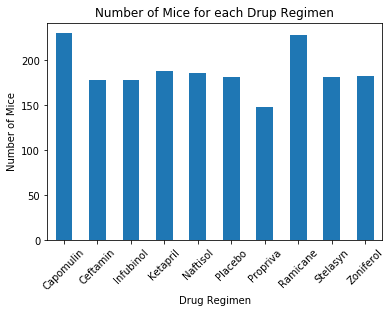

In [8]:
# Generate a bar plot showing the number of mice for each treatment throughout the course of the study using pandas.
summary_count_df=combined_clean_mice_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["count"]})
summary_count_df
df_new=summary_count_df.iloc[:,0]
df_new.plot(kind="bar",rot=45)
plt.ylabel("Number of Mice")
plt.title("Number of Mice for each Drup Regimen")
plt.show()


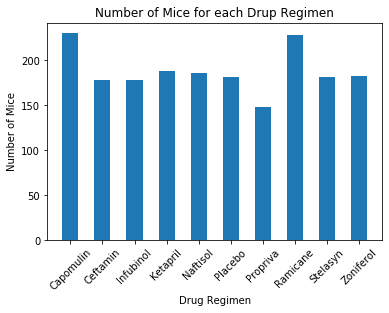

In [9]:
# Generate a bar plot showing the number of mice for each treatment throughout the course of the study using pyplot.
count_tumor_by_drug=drug_regimen['Tumor Volume (mm3)'].count()
list3=count_tumor_by_drug.index.values.tolist()
x_axis=np.arange(len(count_tumor_by_drug))
plt.bar(x_axis,count_tumor_by_drug, align="center",width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list3,rotation=45)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.title("Number of Mice for each Drup Regimen")
plt.show()

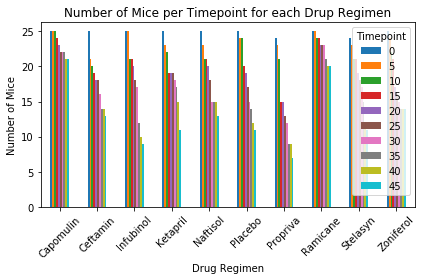

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_chart_pd=combined_clean_mice_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"].unstack().plot(kind="bar",rot=45)
bar_chart_pd.set_xlabel("Drug Regimen")
bar_chart_pd.set_ylabel("Number of Mice")
bar_chart_pd.set_title("Number of Mice per Timepoint for each Drup Regimen")
plt.tight_layout()

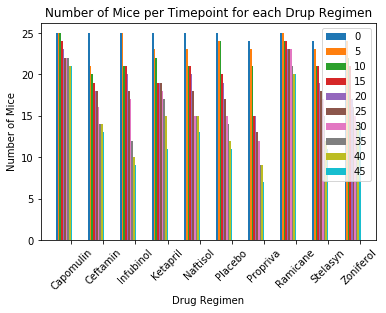

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

ax = plt.subplot()

drugs = combined_clean_mice_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"].unstack().index.to_list()
timepoints = combined_clean_mice_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"].unstack().values.T
counter = 0
_X = np.arange(len(drugs))

for timepoint in timepoints:
    x= _X + counter
    counter+=0.05
    y= timepoint
    ax.bar(x, y, width=0.05, align='center')
new=[0,5,10,15,20,25,30,35,40,45]
plt.legend(new, loc=0)
plt.xticks(x, drugs,rotation=45)
plt.title("Number of Mice per Timepoint for each Drup Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

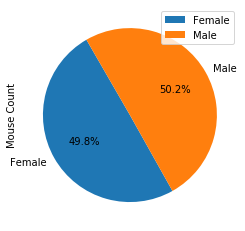

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender=mouse_metadata.groupby('Sex').count()
mice_gender_df=mice_gender.rename(columns={"Mouse ID": "Mouse Count"})
mice_gender_df2=mice_gender_df[["Mouse Count"]]
mice_gender_pie=mice_gender_df2.plot(kind="pie", subplots=True, autopct="%1.1f%%",startangle=120)



<ipython-input-13-79b417d74cfe>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(mice_gender_df2.values,  labels=mice_gender_df2.index.values,autopct="%1.1f%%",startangle=120)


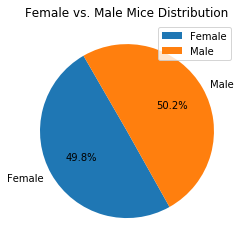

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender_df2.values,  labels=mice_gender_df2.index.values,autopct="%1.1f%%",startangle=120)
plt.title("Female vs. Male Mice Distribution")
plt.tight_layout
plt.legend(loc=1)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
drug_selection_df=combined_clean_mice_df.loc[combined_clean_mice_df["Timepoint"]==45]
drug_selection_df=drug_selection_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_selection_df=pd.DataFrame(drug_selection_df)
drug_selection_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ketapril,70.662958
Naftisol,69.265506
Placebo,68.084082
Propriva,66.258529
Ramicane,34.955595
Stelasyn,68.438310


In [15]:
# Find the most promising treatment regimens.
most_promising_drugs=drug_selection_df.nsmallest(4, ["Tumor Volume (mm3)"])
most_promising_drugs
drugs2=list(most_promising_drugs.index)
drugs2

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [16]:
#Choose the last datapoint of the most promising treatment regimens for each mouse.
best_regimen_df=combined_clean_mice_df[combined_clean_mice_df["Drug Regimen"].isin(drugs2)]
best_regimen_df2=best_regimen_df[["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
last_time_point_df=best_regimen_df2.groupby('Mouse ID').tail(1)
last_time_point_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
493,a275,Ceftamin,45,62.999356
327,a411,Ramicane,45,38.407618
430,a444,Ramicane,45,43.047543


In [17]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
def metrics_func(s_df):
    ram_quartiles=s_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    ram_lowerq=ram_quartiles[0.25]
    ram_upperq=ram_quartiles[0.75]
    ram_iqr=ram_upperq-ram_lowerq
    ram_lower_bound=ram_lowerq -(1.5*ram_iqr)
    ram_upper_bound=ram_upperq -(1.5*ram_iqr)
    outlier_ramicane = s_df.loc[(s_df["Tumor Volume (mm3)"] < ram_lower_bound) | (s_df["Tumor Volume (mm3)"] > ram_upper_bound)]
    outlier_ramicane_list=np.round(outlier_ramicane[["Tumor Volume (mm3)"]].values.flatten(),2)
    return ram_lowerq, ram_upperq, ram_iqr,ram_lower_bound, ram_upper_bound, outlier_ramicane_list

drug_volumes=[]        
for drug in drugs2:
    
    some_df = last_time_point_df[last_time_point_df['Drug Regimen'] == drug]
    
    drug_volumes.append(some_df["Tumor Volume (mm3)"])
    
    ram_lowerq, ram_upperq, ram_iqr,ram_lower_bound, ram_upper_bound, outlier_ramicane_list= metrics_func(some_df)
    print(f"\nFor {drug} iqr is {round(ram_iqr)} & 25% quartile is {round(ram_lowerq)} & 75% quartile is {round(ram_upperq)}. Outlier tumor volumes are below {round(ram_lower_bound)} and above {round(ram_upper_bound)}")
    print(f" The outlier tumor volumes for {drug} is as follows: {outlier_ramicane_list}")
    print("*******************************************************************************")




For Ramicane iqr is 9.0 & 25% quartile is 32.0 & 75% quartile is 41.0. Outlier tumor volumes are below 18.0 and above 27.0
 The outlier tumor volumes for Ramicane is as follows: [38.41 43.05 38.81 32.98 38.34 33.4  37.31 40.66 29.13 33.56 36.37 31.56
 36.13 30.56 31.1  45.22 36.56 37.23 43.42 30.28 40.67 43.17 44.18 30.64]
*******************************************************************************

For Capomulin iqr is 8.0 & 25% quartile is 32.0 & 75% quartile is 40.0. Outlier tumor volumes are below 21.0 and above 28.0
 The outlier tumor volumes for Capomulin is as follows: [38.98 38.94 30.49 37.07 40.16 47.69 37.31 38.13 38.75 41.48 38.85 33.33
 46.54 32.38 41.58 40.73 34.46 31.02 40.66 39.95 36.04 31.9 ]
*******************************************************************************

For Ceftamin iqr is 16.0 & 25% quartile is 49.0 & 75% quartile is 64.0. Outlier tumor volumes are below 25.0 and above 41.0
 The outlier tumor volumes for Ceftamin is as follows: [63.   45.   56.06

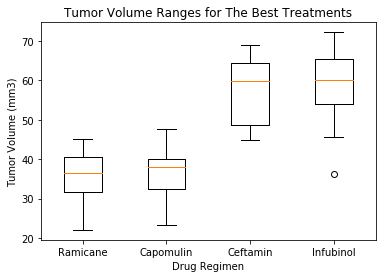

In [18]:
#Boxplot for Four Best Drug Regimen

plt.boxplot(drug_volumes, labels=drugs2)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Ranges for The Best Treatments")
plt.show()

## Line and Scatter Plots

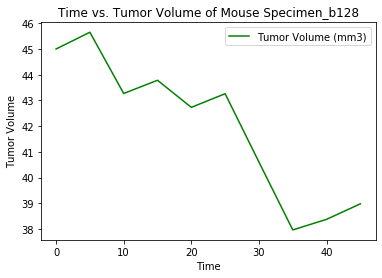

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice=combined_clean_mice_df[combined_clean_mice_df['Drug Regimen'] == "Capomulin"]
mouse_b128=capomulin_mice[capomulin_mice["Mouse ID"]=="b128"]
mouse_b128.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", c="green")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.title("Time vs. Tumor Volume of Mouse Specimen_b128")
plt.show()

In [20]:
#Create DataFrame for Capomulin Mice Metadata and Average Tumor Volume (mm3)

capomulin_meta_data=mouse_metadata[mouse_metadata['Drug Regimen'] == "Capomulin"]
cap_study_data=study_results.groupby("Mouse ID").mean()
merged4=pd.merge(capomulin_meta_data, cap_study_data, on="Mouse ID", how="inner")
merged4=merged4.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})


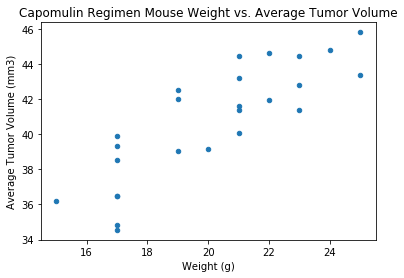

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot=merged4.plot.scatter(x='Weight (g)',y='Average Tumor Volume (mm3)')
plt.title("Capomulin Regimen Mouse Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708721
y = 0.95x + 21.55
Since 0.841936342469472 is more than 0.7, average tumor volume and weight are strongly correlated


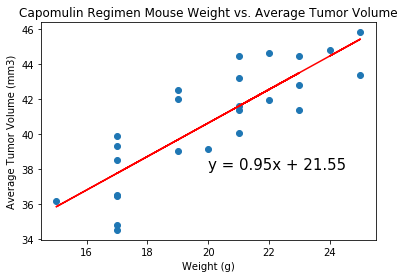

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = merged4['Weight (g)']
y_values = merged4['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin Regimen Mouse Weight vs. Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
print(f"Since {rvalue} is more than 0.7, average tumor volume and weight are strongly correlated")

plt.show()
